<a href="https://colab.research.google.com/github/ravilladivyaUNT/Divya_INFO5731_-Spring2022/blob/main/In_CLASS_exercise_04_Final_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fourth in-class-exercise (40 points in total, 03/29/2022)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

packages used in this TASK are re, gensim, spacy and pyLDAvis. Besides this we will also using matplotlib, numpy and pandas for data handling and visualization. Let’s import them.

In [ ]:
# Write your code here
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
!pip install pyldavis
import pyLDAvis
import gensim
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings



     |████████████████████████████████| 1.7 MB 4.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=b994dcad31b2f42f00f707f9e2d9a3f99d227e97bb6a35090493dfdae7c5a016
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyldavis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
import nltk
nltk.download('stopwords')

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# load reviews dataset
data = pd.read_csv('Reviews.csv')
reviews = list(data['Review of the movie'].values)

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

reviews_words = list(sent_to_words(reviews))

print(reviews_words[:1])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[['excellent', 'movie', 'everybody', 'acted', 'well', 'in', 'the', 'movie', 'songs', 'and', 'bgm', 'in', 'the', 'movie', 'were', 'excellent', 'the', 'movie', 'was', 'so', 'interesting', 'and', 'thrilling', 'this', 'is', 'the', 'best', 'tamil', 'movie', 'of', 'excellent', 'movie']]


In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(reviews_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[reviews_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[reviews_words[0]]])


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['excellent', 'movie', 'everybody', 'acted', 'well', 'in', 'the', 'movie', 'songs', 'and', 'bgm', 'in', 'the', 'movie', 'were', 'excellent', 'the', 'movie', 'was', 'so', 'interesting', 'and', 'thrilling', 'this', 'is', 'the', 'best', 'tamil', 'movie', 'of', 'excellent', 'movie']


In [ ]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
reviews_words_nostops = remove_stopwords(reviews_words)

# Form Bigrams
reviews_words_bigrams = make_bigrams(reviews_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
reviews_lemmatized = lemmatization(reviews_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(reviews_lemmatized[:1])

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

[['excellent', 'movie', 'act', 'movie', 'song', 'excellent', 'movie', 'interesting', 'thrill', 'good', 'tamil', 'movie', 'excellent', 'movie']]


/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(reviews_lemmatized)

# Create Corpus
texts = reviews_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 3), (2, 1), (3, 1), (4, 5), (5, 1), (6, 1), (7, 1)]]


In [ ]:
# builiding ldamodel
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
# printing the topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.047*"word" + 0.029*"emotion" + 0.026*"person" + 0.021*"describe" + '
  '0.020*"love" + 0.016*"extra" + 0.015*"heart_touche" + 0.015*"background" + '
  '0.012*"innocent" + 0.012*"voice"'),
 (1,
  '0.033*"change" + 0.027*"say" + 0.026*"awesome" + 0.018*"extraordinary" + '
  '0.018*"script" + 0.015*"side" + 0.014*"review" + 0.014*"full" + '
  '0.013*"actress" + 0.013*"respect"'),
 (2,
  '0.030*"case" + 0.021*"human" + 0.018*"police" + 0.015*"lawyer" + '
  '0.014*"understand" + 0.014*"court" + 0.011*"chandru" + 0.010*"torture" + '
  '0.010*"face" + 0.010*"oppress"'),
 (3,
  '0.117*"movie" + 0.039*"watch" + 0.031*"good" + 0.027*"story" + 0.025*"film" '
  '+ 0.019*"act" + 0.017*"actor" + 0.017*"must" + 0.016*"make" + 0.014*"real"'),
 (4,
  '0.046*"create" + 0.018*"least" + 0.015*"upper" + 0.010*"relate" + '
  '0.010*"cruel" + 0.010*"leave" + 0.009*"put" + 0.009*"presence" + '
  '0.009*"visual" + 0.008*"realize"'),
 (5,
  '0.016*"narration" + 0.015*"like" + 0.014*"wait" + 0.013*"ins

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=reviews_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for


Perplexity:  -6.939505756062228

Coherence Score:  0.47917071513383336


In [ ]:
import pyLDAvis.gensim_models
#pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.407110  0.161963       1        1  56.539195
7     -0.133671 -0.329397       2        1  12.533654
2     -0.024597 -0.075462       3        1   6.660864
1      0.058040  0.071501       4        1   6.314070
9      0.060527  0.012457       5        1   5.440348
4      0.074161  0.013577       6        1   2.707848
5      0.103187  0.052059       7        1   2.549660
6      0.094022  0.046028       8        1   2.488175
8      0.094348  0.045724       9        1   2.438184
0      0.081092  0.001549      10        1   2.328001, topic_info=          Term         Freq        Total Category  logprob  loglift
4        movie  1747.000000  1747.000000  Default  30.0000  30.0000
222     people   262.000000   262.000000  Default  29.0000  29.0000
277       show   177.000000   177.000000  Default  28.0000  28.0000
25       watch   585.000000   585.000

We generated 10 topics.\
Top 10 words from each topic are as follows:\
Topic 0: "awesome", "line", "cinematography", "slow", "selection", "exactly",    "begin", "tamilnadu", "economic", "fighting"\
Topic 1: "creation", "seene", "ideologically", "heartless", "cinematically", "vibe", "fiction", "ridiculous", "unbelievable", "regard"\
Topic 2: "film", "side", "aspect", "handle", "point", "history", "attempt", "hard_hitte", "star", "hit"\
Topic 3: "brilliant", "situation", "touch", "respect", "set", "due", "speechless", "choose", "use", "interesting"\
Topic 4: "people", "caste", "tribal", "police", "justice", "case", "face, "chandru", "show", "system"\
Topic 5:"movie", "watch", "good", "story", "film", "act", "make", "actor", "surya", "great"\
Topic 6: "want", "write", "lot", "problem", "hate", "religion", "bgm", "title" , "view", "judiciary"\
Topic 7: "sir", "actress", "hero", "huge", "far", "fan", "value", "salute", "seem", "cinematography"\
Topic 8: "ahaaa", "tv", "bane", "informative", "nomination", "backward", "detective", "lovely", "thousand", "singhni"\
Topc 9:
  "right", "leave", "emotion", "today", "rich", "main", "upper", "let", "least" , "struggle"'\

## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [ ]:
# Write your code here
#import modules
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import pandas as pd
import os



Since the goal of this analysis is to perform topic modeling, let’s focus only on the text data from each paper, and drop other metadata columns. Also, for the demonstration, we’ll only look at 100 papers

In [ ]:
def load_data(file_name):
    reviews = pd.read_csv(file_name)
    documents_list = list(reviews['Review of the movie'].values)
    
    return documents_list

In [ ]:
def preprocess_data(doc_set):
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        try:
            raw = i.lower()
        except:
            #print(i)
            continue
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

In [ ]:
def prepare_corpus(doc_clean):
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

def create_gensim_lsa_model(doc_clean, number_of_topics, words):
    dictionary, doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    #print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    for topic in lsamodel.print_topics(num_topics=number_of_topics, num_words=words):
        print(topic)
        print()
    return lsamodel

def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=num_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()
    



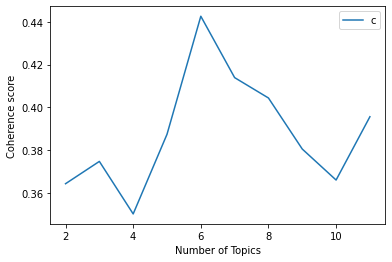

In [ ]:
start,stop,step=2,12,1
document_list = load_data("Reviews.csv")
clean_text = preprocess_data(document_list)

plot_graph(clean_text,start,stop,step)

In [ ]:
# we observed that the no of optimal no of topics is 6

number_of_topics = 6
words = 10
document_list = load_data("Reviews.csv")
clean_text = preprocess_data(document_list)
model = create_gensim_lsa_model(clean_text,number_of_topics,words)

(0, '0.760*"movi" + 0.210*"watch" + 0.165*"film" + 0.127*"stori" + 0.123*"jai" + 0.118*"one" + 0.116*"bhim" + 0.103*"cast" + 0.103*"act" + 0.100*"peopl"')

(1, '-0.509*"film" + 0.492*"movi" + -0.171*"bhim" + -0.168*"jai" + -0.151*"polic" + -0.148*"chandru" + -0.130*"cast" + -0.116*"rajakannu" + -0.111*"case" + -0.110*"scene"')

(2, '0.449*"watch" + 0.397*"must" + 0.320*"hard" + 0.319*"superb" + 0.318*"word" + 0.316*"man" + 0.313*"incred" + 0.311*"heat" + -0.169*"movi" + -0.024*"bhim"')

(3, '-0.544*"film" + -0.380*"10" + 0.201*"polic" + 0.191*"chandru" + 0.165*"case" + -0.149*"vote" + 0.136*"rajakannu" + 0.123*"bhim" + 0.122*"justic" + 0.117*"jai"')

(4, '-0.463*"stori" + -0.308*"good" + -0.286*"act" + 0.244*"movi" + -0.184*"well" + -0.179*"actor" + 0.160*"film" + -0.158*"suriya" + 0.156*"10" + 0.155*"jai"')

(5, '-0.429*"jai" + -0.410*"bhim" + 0.171*"stori" + -0.161*"10" + 0.151*"film" + -0.137*"suriya" + -0.133*"actor" + 0.110*"cast" + 0.110*"best" + 0.085*"cop"')



The optimal no of topics on using LSA model is 6.\
The top 10 words from each topic are as above

## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [ ]:
# Write your code here
#from lda2vec import preprocess, Corpus
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

try:
    import seaborn
except:
    pass



Here we can use very recent version of pyLDAvis to use the lda2vec outputs. As of this writing, 16 or this commit 14e7b5f60d8360eb84969f3f08a1b77b365a5878e should work. You can do this quickly by installing it directly from master like so

In [ ]:
import pyLDAvis
pyLDAvis.enable_notebook()

Now aftwrunnning lda2vec_run.py script in examples/twenty_newsgroups/lda2vec directory a topics.pyldavis.npz will be created that contains the topic-to-word probabilities and frequencies.

In [ ]:
#npz = np.load(open('topics.pyldavis.npz', 'r'), allow_pickle=True)
npz = np.load('topics.pyldavis.npz')
dat = {k: v for (k, v) in npz.iteritems()}
dat['vocab'] = dat['vocab'].tolist()
# dat['term_frequency'] = dat['term_frequency'] * 1.0 / dat['term_frequency'].sum()
top_n = 10
topic_to_topwords = {}
for j, topic_to_word in enumerate(dat['topic_term_dists']):
    top = np.argsort(topic_to_word)[::-1][:top_n]
    msg = 'Topic %i '  % j
    top_words = [dat['vocab'][i].strip()[:35] for i in top]
    msg += ' '.join(top_words)
    print(msg)
    topic_to_topwords[j] = top_words

Topic 0 jesus god orthodox faith verse worship belief christianity christian mormon
Topic 1 bike tire honda battery brake ride valve aluminum intake jeep
Topic 2 game team play win baseball score playoff mets goal phillies
Topic 3 shuttle nasa space payload computational planetary satellite mission launch lunar
Topic 4 armenian troop cyprus israel soldier agdam bayonet terror bullet he
Topic 5 drive controller battery dock connector ink card slot pin vram
Topic 6 key encrypt cryptosystem encryption cryptography secure rsa crypto eavesdrop decrypt
Topic 7 ride revolver bike bikers go jeep i dog a tank
Topic 8 homicide gun handgun firearm fbi unconstitutional federal smuggle drug weapon
Topic 9 israel armenian plo cyprus troop lebanese arab palestinian syria turkish
Topic 10 armenian bayonet arena team turkish tartar nhl playoff game defenseman
Topic 11 widget server contrib font editor format mit pixmap toolkit binary
Topic 12 controller card disk bios rom vram drive isa vga trident
Top

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: NpzFile.iteritems is deprecated in python 3, to match the removal of dict.itertems. Use .items() instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Topic 0 x11r5 xv window xterm server motif font xlib // sunos
Topic 1 jesus son father matthew sin mary g'd disciples christ sins
Topic 2 s1 nsa s2 clipper chip administration q escrow private sector serial number encryption technology
Topic 3 leafs games playoffs hockey game players pens yankees bike phillies
Topic 4 van - 0 pp en 1 njd standings 02 6
Topic 5 out_of_vocabulary out_of_vocabulary anonymity hiv homicide adl ripem bullock encryption technology eff
Topic 6 hiv magi prof erzurum venus van 2.5 million ankara satellite launched
Topic 7 nsa escrow clipper chip encryption government phones warrant vat

In [ ]:
import warnings
warnings.filterwarnings('ignore')
prepared_data = pyLDAvis.prepare(dat['topic_term_dists'], dat['doc_topic_dists'], 
                                 dat['doc_lengths'] * 1.0, dat['vocab'], dat['term_frequency'] * 1.0, mds='tsne')

In [ ]:
from sklearn.datasets import fetch_20newsgroups
remove=('headers', 'footers', 'quotes')
texts = fetch_20newsgroups(subset='train', remove=remove).data

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

In [ ]:
msg = "{weight:02d}% in topic {topic_id:02d} which has top words {text:s}"
for topic_id, weight in enumerate(dat['doc_topic_dists'][1]):
    if weight > 0.01:
        text = ', '.join(topic_to_topwords[topic_id])
        print(msg.format(topic_id=topic_id, weight=int(weight * 100.0), text=text))

07% in topic 01 which has top words bike, tire, honda, battery, brake, ride, valve, aluminum, intake, jeep
02% in topic 03 which has top words shuttle, nasa, space, payload, computational, planetary, satellite, mission, launch, lunar
24% in topic 05 which has top words drive, controller, battery, dock, connector, ink, card, slot, pin, vram
05% in topic 11 which has top words widget, server, contrib, font, editor, format, mit, pixmap, toolkit, binary
23% in topic 12 which has top words controller, card, disk, bios, rom, vram, drive, isa, vga, trident
22% in topic 13 which has top words cd, shuttle, sale, frequency, antenna, disc, space, shipping, offer, model
12% in topic 19 which has top words font, icon, window, server, editor, format, disk, card, terminal, i


<BarContainer object of 20 artists>

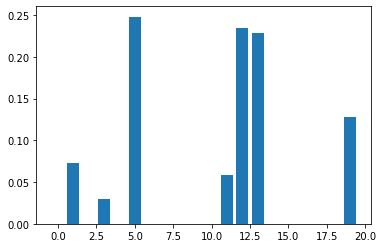

In [ ]:
plt.bar(np.arange(20), dat['doc_topic_dists'][1])

There are 7% of records belonging to Topic 1 which has top 10 words as bike, tire, honda, battery, brake, ride, valve, aluminum, intake, jeep\
\
There are 24% of topics belonging to Topic 5 which has top 10 words as drive, controller, battery, dock, connector, ink, card, slot, pin, vram\
\
There are 23% of records belonging to Topic 12 which has top 10 words as controller, card, disk, bios, rom, vram, drive, isa, vga, trident\
\
There are 22% of records belonging to Topic 13 which has top 10 words as cd, shuttle, sale, frequency, antenna, disc, space, shipping, offer, model\
\
There are 12% of records belonging to Topic 19 which has top 10 words as font, icon, window, server, editor, format, disk, card, terminal\ 


## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install stop_words

  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32911 sha256=1f24c40645b2fbfde5ad95ca9e6014bb350092c523ce67b21f803f8b4ed2a443
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [ ]:
!pip install bertopic

     |████████████████████████████████| 57 kB 2.4 MB/s 
     |████████████████████████████████| 5.2 MB 8.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 79 kB 7.1 MB/s 
     |████████████████████████████████| 88 kB 6.4 MB/s 
     |████████████████████████████████| 4.0 MB 30.8 MB/s 
     |████████████████████████████████| 1.2 MB 11.5 MB/s 
     |████████████████████████████████| 77 kB 3.9 MB/s 
     |████████████████████████████████| 895 kB 36.6 MB/s 
     |████████████████████████████████| 636 kB 35.9 MB/s 
     |████████████████████████████████| 6.6 MB 35.3 MB/s 
     |████████████████████████████████| 1.1 MB 34.2 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330901 sha256=b39a1eb38f84ce364266455b4988488e8804a17aaec3b199f7fdb87659f33394
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4

In [ ]:
!pip install sentence_transformers

In [ ]:
# Write your code here
#from sklearn.datasets import fetch_20newsgroups
import pandas as pd

data = pd.read_csv("/content/gdrive/My Drive/Reviews.csv")
#reviews = list(data['Review of the movie'].str.lower().values)
data['Review of the movie'] = data['Review of the movie'].fillna("")
data['Review of the movie'] = data['Review of the movie'].str.lower()
data['Review of the movie'] = data['Review of the movie'].replace('[^a-zA-Z0-9 ]', '')

import re
from stop_words import get_stop_words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
stop_words = list(get_stop_words('en'))

print((set(list(STOPWORDS)) | set(list(stop_words))))
stopwords = list(set(list(STOPWORDS)) | set(list(stop_words)))
print(type(list(STOPWORDS)))
print(type((stop_words)))
stopwords.extend(['oh', 'yeah','like', 'came', 'back', 'go', 'know', 'said', 'went', 'us', 'think', 'one', 'yes', 'years', 'old', 'little', 'bit', 'uhhuh', 'everything', 'else', 'two', 
                  'three','kind', 'thing', 'remember', 'get', 'kind', 'thing', 'take', 'say', 'really', 'want', 'make', 'use', 'come', 'gonna', 'jpn', 'japanese', 'american', 'huh', 
                  'within', 'mi', 'blah', 'goddamn', 'hata', 'oclock', 'basically', 'dee', 'mp', 'fresno', 'anymore', 'topaz', 'mama', 'yah', 'til', 'toru', 'two', 'four', 'five', 'six', 
                  'seven', 'eight', 'nine', 'eng', 'particular', 'min', 'certainly', 'rather', 'twelve'])
print(len(stopwords))
stopwords = [re.sub('[^a-zA-Z0-9]+', '', word) for word in stopwords]

data['clean_reviews'] = data['Review of the movie'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{"we're", 're', 'just', 'we', 'whom', 'hasn', "it's", 'so', 'been', 'for', 'weren', 'ma', 'between', "he'd", 'most', "mustn't", 'after', "they've", 'haven', 'me', 'few', 'nor', "who's", 'here', 'other', 'by', 'the', 'that', 'any', "when's", 'being', 'again', 'd', 'yours', "here's", 'you', 'then', 'such', 'her', "you've", 'only', 'i', 'm', 'ourselves', 'will', "we've", "weren't", 'out', 'isn', 'before', 'could', 'doing', 'do', 'these', 'during', 'have', "they're", 'some', "i've", "there's", 'would', 'what', 'mustn', 'not', 'aren', "can't", 'no', "she's", 'more', 'am', 'or', 'him', "haven't", 'didn', 'herself', 'own', 'up', 'this', 'they', 'off', "isn't", 'shan', 'can', "they'll", 'to', "you'll", 'until', "he's", 'above', "needn't", 'where', 'his', 'those', "hasn't", 'over', 'into', "that'll", 'did', "she'll", "doesn't", 'why', 'while', "shouldn't", "they'd", 'with', 'in

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()

data['clean_reviews'] = data['clean_reviews'].apply(lambda row: " ".join(wordnet_lemmatizer.lemmatize(word, pos="v") for word in row.split()))
data['clean_reviews'] = data['clean_reviews'].apply(lambda row: " ".join(wordnet_lemmatizer.lemmatize(word, pos="n") for word in row.split()))
data['clean_reviews'] = data['clean_reviews'].apply(lambda row: " ".join(wordnet_lemmatizer.lemmatize(word, pos="a") for word in row.split()))
data['clean_reviews'] = data['clean_reviews'].apply(lambda row: " ".join(wordnet_lemmatizer.lemmatize(word, pos="r") for word in row.split()))

data['advlem_clean_reviews'] = data['clean_reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

import nltk
nltk.download('punkt') 
allWords = nltk.tokenize.word_tokenize(" ".join(i for i in data['advlem_clean_reviews'].values))
allWordDist = nltk.FreqDist(w.lower() for w in allWords)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
common_words_from_answers = {}
for common_word in list(allWordDist):
    #print(common_word, allWordDist[common_word])
    common_words_from_answers[common_word] = allWordDist[common_word]

common_words_sorted = dict(sorted(common_words_from_answers.items(), key=lambda item: item[1], reverse = True))

print(len(stopwords))
data['advlem_clean_reviews'] = data['advlem_clean_reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

print(len(list(data['advlem_clean_reviews'])))
doc = []
for i in list(data['advlem_clean_reviews']):
  if i != "":
    doc.append(i)

print(len(doc))

280
1100
991


In [ ]:
from sentence_transformers import SentenceTransformer

sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = sentence_model.encode(doc, show_progress_bar=True)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Batches:   0%|          | 0/31 [00:00<?, ?it/s]

In [ ]:
from bertopic import BERTopic

# initializing BERTopic model and fitting the document
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(doc, embeddings)

freq = topic_model.get_topic_info(); 
freq

2022-04-25 04:27:24,678 - BERTopic - Reduced dimensionality with UMAP
2022-04-25 04:27:24,772 - BERTopic - Clustered UMAP embeddings with HDBSCAN


,Topic,Count,Name
0,-1,387,-1_movie_watch_story_film
1,0,137,0_people_movie_caste_india
2,1,115,1_movie_great_watch_story
3,2,101,2_jai_bhim_movie_film
4,3,57,3_indian_movie_south_bollywood
5,4,47,4_surya_best_movie_story
6,5,22,5_amaze_character_movie_cast
7,6,17,6_award_suriya_oscar_deserve
8,7,16,7_jose_lijomol_manikandan_performance
9,8,14,8_rat__movie_imdb


In [ ]:
# topic 0 words and their scores
topic_model.get_topic(0)

[('people', 0.04602180102948386),
 ('movie', 0.03342526192751266),
 ('caste', 0.03256580340596319),
 ('india', 0.029414466880502265),
 ('police', 0.028104541869382882),
 ('justice', 0.02789133216727394),
 ('show', 0.027383311565590356),
 ('society', 0.02412817385896225),
 ('system', 0.022361125299674517),
 ('watch', 0.020961093637306964)]

In [ ]:
topic_model.visualize_topics()

In [ ]:
# Hierachical clustering of topicss 
topic_model.visualize_hierarchy(top_n_topics=12)

In [ ]:
topic_model.visualize_barchart(top_n_topics=12, n_words = 10, width = 300, height = 300)

BERTopic generated 14 topics from the given reviews.csv corpus.\
The top 10 words from each topic can be found in the above Topic word scores distribution.

## (5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.

In all the 4 techniques we applied BERTopic gives us the best results about the topics present in the corpus.\
BERTopic is simple and eacy to interpret the results.\
Whereas, the models such as LSA, LDA, lda2vec are difficult to execute and understand.\
LDA visualization of results gives us topic wise understanding of topics, whereas BERTopic gives the topic word scores distribution of all topics at a glance.\
It is easy to understand the BERTopic results as there are various visualization options like visualising hierarchy of topics, visualise term rank etc.\
Some of the topics obtained from BERTopic and their description are as follows\
Topic 0 is about movie subject and story.\
Topic 1 is discussing jai bhim movie and the need of watching the movie as must.\
Topic 2 is discussing about south indian movie.\
Topic 3 is talking about caste and injustice occured to the people in the movie.\
